In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix, classification_report

In [4]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'messages'])

In [5]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df['label'] = df.label.map({'ham' : 0, 'spam' : 1})

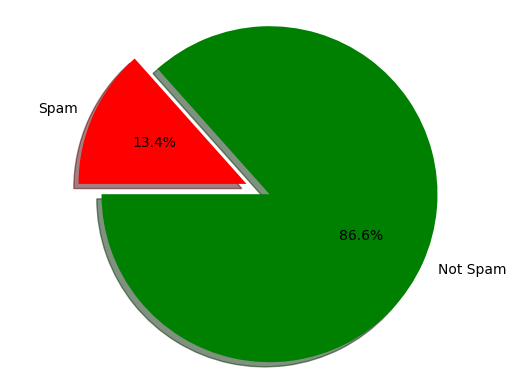

In [15]:
count_Class = pd.value_counts(df.label, sort = True)

# Data to Plot
labels = 'Not Spam', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['green', 'red']
explode = (0.075, 0.075)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.axis('equal')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = tts(df['messages'], df['label'], test_size=0.2, random_state=1)

In [17]:
count_vector = CountVectorizer()
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)

In [18]:
Mnb = MultinomialNB()
Mnb.fit(train_data, y_train)

MultinomialNB()

In [19]:
MultinomialNB()

MultinomialNB()

In [20]:
MnbPredicts = Mnb.predict(test_data)

In [22]:
print("The accuracy of our Naïve Bayes multinomial model is {} %".format(accuracy_score(y_test, MnbPredicts) * 100))
print("The Precision of our Naïve Bayes multinomial model is {} %". format(precision_score(y_test, MnbPredicts)* 100))
print("The Recall of our Naïve Bayes multinomial model is {} %" . format(recall_score(y_test, MnbPredicts)* 100))

The accuracy of our Naïve Bayes multinomial model is 99.01345291479821 %
The Precision of our Naïve Bayes multinomial model is 97.88732394366197 %
The Recall of our Naïve Bayes multinomial model is 94.5578231292517 %


The accuracy of Naive Bayes clasifier is 99.01345291479821%

 [[965   3]
 [  8 139]]


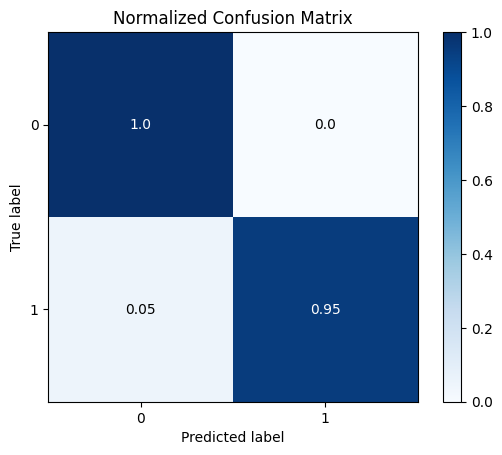

In [25]:
confusionmatrix = confusion_matrix(y_test, MnbPredicts)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy_score(y_test, MnbPredicts) * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(y_test, MnbPredicts, normalize = True)
plt.show()

In [26]:
new_test_sample_ham = ["Hi, I'm Rohan Murugan. This is a test program that I'd like to show you."]

In [34]:
new_test_sample_spam= ["Congratulations, you've won a free TV."]

In [35]:
new_test_sample_ham_vectorized = count_vector.transform(new_test_sample_ham)

In [36]:
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)

In [37]:
sample_predict = Mnb.predict(new_test_sample_ham_vectorized)
sample_predict

array([0])

In [38]:
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
sample_predict

array([1])